In [1]:
!pip install soccerdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.1 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=9e47b8e9eb1c4710906386614ce121a0ef96d7655f21ae4283503aef18d39c91
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected-chromedr

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/09/25 03:19:06] INFO     No custom team name replacements found. You can configure these in       ]8;id=630202;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=140063;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     No custom league dict found. You can configure additional leagues in    ]8;id=758917;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=339538;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#197\197]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="Big 5 European Leagues Combined", seasons=2425)
print(fbref.__doc__)

[06/09/25 03:19:11] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=114924;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=840548;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
# 1 - Join player_season_misc + player_season_std
 #por nome ou idade

# Filtrar jogadores com pelo menos 600 minutos jogados

# Remover goleiros (GK), Meias (MF) e Atacantes (FW)

#2- Selecionar as colunas   ('Playing Time', 'Min'),
#    ('Progression', 'PrgC'),
#    ('Progression', 'PrgP')
#    ('Aerial Duels', 'Won%'),
#    ('Aerial Duels', 'Won'),
#    ('Aerial Duels', 'Lost')
#     Fls
#   Defensive Action Tkl,TklW (%),Err,Int


In [6]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/09/25 03:19:17] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=329651;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=904076;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born  \
                                                                          
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997   
                                  Bukayo Saka      ENG  FW,MF  22  2001   
                                  David Raya       ESP     GK  28  1995   
                                  Declan Rice      ENG     MF  25  1999   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   

                                                Playing Time               \
                                                          MP Starts   Min   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White               17     13  1198   
                                  Bukayo Saka             25     20  1729   
                                  David Raya              38     38  3420   
                                  Declan Rice             35     33  2825   
                                  Ethan Nwaneri           26     11   895   

                                                      Performance      ...  \
                                                  90s         Gls Ast  ...   
league             season team    player                               ...   
ENG-Premier League 2425   Arsenal Ben White      13.3           0   2  ...   
                                  Bukayo Saka    19.2           6  10  ...   
                                  David Raya     38.0           0   0  ...   
                                  Declan Rice    31.4           4   7  ...   
                                  Ethan Nwaneri   9.9           4   2  ...   

                                                Per 90 Minutes              \
                                                           Gls   Ast   G+A   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White                0.0  0.15  0.15   
                                  Bukayo Saka             0.31  0.52  0.83   
                                  David Raya               0.0   0.0   0.0   
                                  Declan Rice             0.13  0.22  0.35   
                                  Ethan Nwaneri            0.4   0.2   0.6   

                                                                          \
                                                 G-PK G+A-PK    xG   xAG   
league             season team    player                                   
ENG-Premier League 2425   Arsenal Ben White       0.0   0.15  0.03   0.1   
                                  Bukayo Saka    0.26   0.78  0.36   0.4   
                                  David Raya      0.0    0.0   0.0   0.0   
                                  Declan Rice    0.13   0.35  0.11  0.21   
                                  Ethan Nwaneri   0.4    0.6  0.12  0.12   

                                                                       
                                                xG+xAG  npxG npxG+xAG  
league             season team    player                               
ENG-Premier League 2425   Arsenal Ben White       0.14  0.03     0.14  
                                  Bukayo Saka     0.75  0.31     0.71  
                                  David Raya       0.0   0.0      0.0  
                                  Declan Rice     0.32  0.11     0.32  
                                  Ethan Nwaneri   0.24  0.12     0.24  

[5 rows x 33 columns]

In [7]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

  Playing Time         ... Per 90 Minutes                                 \
            MP Starts  ...            Gls   Ast   G+A  G-PK G+A-PK    xG   
0           17     13  ...            0.0  0.15  0.15   0.0   0.15  0.03   
1           25     20  ...           0.31  0.52  0.83  0.26   0.78  0.36   
2           38     38  ...            0.0   0.0   0.0   0.0    0.0   0.0   
3           35     33  ...           0.13  0.22  0.35  0.13   0.35  0.11   
4           26     11  ...            0.4   0.2   0.6   0.4    0.6  0.12   

                               
    xAG xG+xAG  npxG npxG+xAG  
0   0.1   0.14  0.03     0.14  
1   0.4   0.75  0.31     0.71  
2   0.0    0.0   0.0      0.0  
3  0.21   0.32  0.11     0.32  
4  0.12   0.24  0.12     0.24  

[5 rows x 37 columns]

In [8]:
player_season_pas = fbref.read_player_season_stats(stat_type="passing")
player_season_pas.head()

[06/09/25 03:19:33] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=664205;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=6948;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Total                      \
                                                  Cmp   Att  Cmp% TotDist   
league             season team    player                                    
ENG-Premier League 2425   Arsenal Ben White       580   692  83.8    9173   
                                  Bukayo Saka     552   731  75.5    8408   
                                  David Raya     1040  1413  73.6   24784   
                                  Declan Rice    1376  1650  83.4   23402   
                                  Ethan Nwaneri   342   425  80.5    4906   

                                                         ...  Long Ast  xAG  \
                                                PrgDist  ...  Cmp%            
league             season team    player                 ...                  
ENG-Premier League 2425   Arsenal Ben White        2998  ...  48.0   2  1.4   
                                  Bukayo Saka      2487  ...  48.9  10  7.6   
                                  David Raya      17222  ...  37.7   0  0.0   
                                  Declan Rice      6234  ...  48.8   7  6.6   
                                  Ethan Nwaneri    1216  ...  51.4   2  1.2   

                                                Expected        KP  1/3 PPA  \
                                                      xA A-xAG                
league             season team    player                                      
ENG-Premier League 2425   Arsenal Ben White          1.4   0.6  10   55  11   
                                  Bukayo Saka        7.8   2.4  58   15  38   
                                  David Raya         0.1   0.0   1   45   3   
                                  Declan Rice        5.6   0.4  59  137  35   
                                  Ethan Nwaneri      1.8   0.8  16   17  16   

                                                CrsPA PrgP  
                                                            
league             season team    player                    
ENG-Premier League 2425   Arsenal Ben White         2   59  
                                  Bukayo Saka      12   70  
                                  David Raya        0   14  
                                  Declan Rice       5  192  
                                  Ethan Nwaneri     6   33  

[5 rows x 28 columns]

In [9]:
player_season_pas = player_season_pas.reset_index()
print(player_season_pas.columns)
player_season_pas.head()

MultiIndex([(  'league',        ''),
            (  'season',        ''),
            (    'team',        ''),
            (  'player',        ''),
            (  'nation',        ''),
            (     'pos',        ''),
            (     'age',        ''),
            (    'born',        ''),
            (     '90s',        ''),
            (   'Total',     'Cmp'),
            (   'Total',     'Att'),
            (   'Total',    'Cmp%'),
            (   'Total', 'TotDist'),
            (   'Total', 'PrgDist'),
            (   'Short',     'Cmp'),
            (   'Short',     'Att'),
            (   'Short',    'Cmp%'),
            (  'Medium',     'Cmp'),
            (  'Medium',     'Att'),
            (  'Medium',    'Cmp%'),
            (    'Long',     'Cmp'),
            (    'Long',     'Att'),
            (    'Long',    'Cmp%'),
            (     'Ast',        ''),
            (     'xAG',        ''),
            ('Expected',      'xA'),
            ('Expected',   'A-xAG'),
 

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Total  ...  Long Ast  xAG Expected        KP  1/3 PPA CrsPA PrgP  
          Cmp  ...  Cmp%                xA A-xAG                          
0  13.3   580  ...  48.0   2  1.4      1.4   0.6  10   55  11     2   59  
1  19.2   552  ...  48.9  10  7.6      7.8   2.4  58   15  38    12   70  
2  38.0  1040  ...  37.7   0  0.0      0.1   0.0   1   45   3     0   14  
3  31.4  1376  ...  48.8   7  6.6      5.6   0.4  59  137  35     5  192  
4   9.9   342  ...  51.4   2  1.2      1.8   0.8  16   17  16     6   33  

[5 rows x 32 columns]

In [10]:
player_season_misc = fbref.read_player_season_stats(stat_type="misc")
player_season_misc.head()

[06/09/25 03:19:42] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=7599;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=377996;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Performance                 \
                                                       CrdY CrdR 2CrdY Fls   
league             season team    player                                     
ENG-Premier League 2425   Arsenal Ben White               2    0     0  10   
                                  Bukayo Saka             3    0     0  15   
                                  David Raya              3    0     0   1   
                                  Declan Rice             7    1     1  21   
                                  Ethan Nwaneri           1    0     0   9   

                                                     ...                      \
                                                Fld  ...  Crs Int TklW PKwon   
league             season team    player             ...                       
ENG-Premier League 2425   Arsenal Ben White       5  ...   17  16   14     0   
                                  Bukayo Saka    39  ...  117   3   15     1   
                                  David Raya     10  ...    0   2    0     0   
                                  Declan Rice    16  ...  164  25   25     0   
                                  Ethan Nwaneri   5  ...   54   2    7     0   

                                                               Aerial Duels  \
                                                PKcon OG Recov          Won   
league             season team    player                                      
ENG-Premier League 2425   Arsenal Ben White         0  0    37           18   
                                  Bukayo Saka       0  0    70           10   
                                  David Raya        1  0    41           13   
                                  Declan Rice       0  0   156           37   
                                  Ethan Nwaneri     0  0    34            4   

                                                             
                                                Lost   Won%  
league             season team    player                     
ENG-Premier League 2425   Arsenal Ben White        9   66.7  
                                  Bukayo Saka     20   33.3  
                                  David Raya       0  100.0  
                                  Declan Rice     25   59.7  
                                  Ethan Nwaneri    8   33.3  

[5 rows x 21 columns]

In [11]:
player_season_misc = player_season_misc.reset_index()
print(player_season_misc.columns)
player_season_misc.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Performance  ...                                    Aerial Duels       \
               CrdY  ...  Crs Int TklW PKwon PKcon OG Recov          Won Lost   
0  13.3           2  ...   17  16   14     0     0  0    37           18    9   
1  19.2           3  ...  117   3   15     1     0  0    70           10   20   
2  38.0           3  ...    0   2    0     0     1  0    41           13    0   
3  31.4           7  ...  164  25   25     0     0  0   156           37   25   
4   9.9           1  ...   54   2    7     0     0  0    34            4    8   

          
    Won%  
0   66.7  
1   33.3  
2  100.0  
3   59.7  
4   33.3  

[5 rows x 25 columns]

In [12]:
player_season_pos = fbref.read_player_season_stats(stat_type="possession")
player_season_pos.head()

[06/09/25 03:20:00] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=662996;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=626905;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

nation    pos age  born   90s  \
                                                                                
league             season team    player                                        
ENG-Premier League 2425   Arsenal Ben White        ENG     DF  26  1997  13.3   
                                  Bukayo Saka      ENG  FW,MF  22  2001  19.2   
                                  David Raya       ESP     GK  28  1995  38.0   
                                  Declan Rice      ENG     MF  25  1999  31.4   
                                  Ethan Nwaneri    ENG  FW,MF  17  2007   9.9   

                                                Touches                  \
                                                Touches Def Pen Def 3rd   
league             season team    player                                  
ENG-Premier League 2425   Arsenal Ben White         813      55     214   
                                  Bukayo Saka       979       6      57   
                                  David Raya       1480     880    1388   
                                  Declan Rice      1948      82     325   
                                  Ethan Nwaneri     544       3      44   

                                                                 ... Carries  \
                                                Mid 3rd Att 3rd  ... Carries   
league             season team    player                         ...           
ENG-Premier League 2425   Arsenal Ben White         367     238  ...     394   
                                  Bukayo Saka       216     715  ...     628   
                                  David Raya         92       0  ...     921   
                                  Declan Rice       909     733  ...    1031   
                                  Ethan Nwaneri     167     339  ...     365   

                                                                              \
                                                TotDist PrgDist PrgC 1/3 CPA   
league             season team    player                                       
ENG-Premier League 2425   Arsenal Ben White        1617     953   23  16   4   
                                  Bukayo Saka      4253    2460   96  32  51   
                                  David Raya       4542    2729    0   0   0   
                                  Declan Rice      6464    3394   90  58  16   
                                  Ethan Nwaneri    2852    1329   46  25  17   

                                                        Receiving       
                                                Mis Dis       Rec PrgR  
league             season team    player                                
ENG-Premier League 2425   Arsenal Ben White      10   6       494   42  
                                  Bukayo Saka    34  40       711  255  
                                  David Raya      1   0       841    0  
                                  Declan Rice    36  32      1266   94  
                                  Ethan Nwaneri  23  17       398  113  

[5 rows x 27 columns]

In [13]:
player_season_pos = player_season_pos.reset_index()
print(player_season_pos.columns)
player_season_pos.head()

MultiIndex([(   'league',        ''),
            (   'season',        ''),
            (     'team',        ''),
            (   'player',        ''),
            (   'nation',        ''),
            (      'pos',        ''),
            (      'age',        ''),
            (     'born',        ''),
            (      '90s',        ''),
            (  'Touches', 'Touches'),
            (  'Touches', 'Def Pen'),
            (  'Touches', 'Def 3rd'),
            (  'Touches', 'Mid 3rd'),
            (  'Touches', 'Att 3rd'),
            (  'Touches', 'Att Pen'),
            (  'Touches',    'Live'),
            ( 'Take-Ons',     'Att'),
            ( 'Take-Ons',    'Succ'),
            ( 'Take-Ons',   'Succ%'),
            ( 'Take-Ons',    'Tkld'),
            ( 'Take-Ons',   'Tkld%'),
            (  'Carries', 'Carries'),
            (  'Carries', 'TotDist'),
            (  'Carries', 'PrgDist'),
            (  'Carries',    'PrgC'),
            (  'Carries',     '1/3'),
            

league season     team         player nation    pos age  born  \
                                                                               
0  ENG-Premier League   2425  Arsenal      Ben White    ENG     DF  26  1997   
1  ENG-Premier League   2425  Arsenal    Bukayo Saka    ENG  FW,MF  22  2001   
2  ENG-Premier League   2425  Arsenal     David Raya    ESP     GK  28  1995   
3  ENG-Premier League   2425  Arsenal    Declan Rice    ENG     MF  25  1999   
4  ENG-Premier League   2425  Arsenal  Ethan Nwaneri    ENG  FW,MF  17  2007   

    90s Touches  ... Carries                                      Receiving  \
        Touches  ... Carries TotDist PrgDist PrgC 1/3 CPA Mis Dis       Rec   
0  13.3     813  ...     394    1617     953   23  16   4  10   6       494   
1  19.2     979  ...     628    4253    2460   96  32  51  34  40       711   
2  38.0    1480  ...     921    4542    2729    0   0   0   1   0       841   
3  31.4    1948  ...    1031    6464    3394   90  58  16  36  32      1266   
4   9.9     544  ...     365    2852    1329   46  25  17  23  17       398   

        
  PrgR  
0   42  
1  255  
2    0  
3   94  
4  113  

[5 rows x 31 columns]

In [14]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_misc.columns = ['_'.join(col).strip() for col in player_season_misc.columns]
player_season_pas.columns = ['_'.join(col).strip() for col in player_season_pas.columns]
player_season_pos.columns = ['_'.join(col).strip() for col in player_season_pos.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_misc.columns)
print(player_season_pas.columns)
print(player_season_pos.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [15]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Performance_G-PK','Performance_Ast','Expected_xG','Expected_xAG','Expected_npxG+xAG','Progression_PrgC','Progression_PrgP']
]
df_misc_selected = player_season_misc[
    ['player_', 'team_','Performance_Crs','Performance_Fld',]
]
df_pas_selected = player_season_pas[
    ['player_', 'team_', 'KP_', '1/3_', 'PPA_','CrsPA_',]
]
df_pos_selected = player_season_pos[
    ['player_', 'team_','Take-Ons_Att','Take-Ons_Succ','Carries_1/3','Carries_CPA','Receiving_PrgR']
]
# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_misc_selected, on=['player_', 'team_'], how='inner')
df_merged_2 = pd.merge(df_merged_1, df_pas_selected, on=['player_', 'team_'], how='inner')
df_merged= pd.merge(df_merged_2, df_pos_selected, on=['player_', 'team_'], how='inner')
# 5. Exibir o resultado
print(df_merged.head())
print(f"Número de linhas: {len(df_merged)}")

         player_    team_   pos_  age_  Playing Time_Min  Performance_G-PK  \
0      Ben White  Arsenal     DF    26              1198                 0   
1    Bukayo Saka  Arsenal  FW,MF    22              1729                 5   
2     David Raya  Arsenal     GK    28              3420                 0   
3    Declan Rice  Arsenal     MF    25              2825                 4   
4  Ethan Nwaneri  Arsenal  FW,MF    17               895                 4   

   Performance_Ast  Expected_xG  Expected_xAG  Expected_npxG+xAG  ...  \
0                2          0.5           1.4                1.8  ...   
1               10          6.8           7.6               13.7  ...   
2                0          0.0           0.0                0.0  ...   
3                7          3.5           6.6               10.1  ...   
4                2          1.2           1.2                2.4  ...   

   Performance_Fld  KP_  1/3_  PPA_  CrsPA_  Take-Ons_Att  Take-Ons_Succ  \
0               

In [16]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Defesas(DF) e Meias (MF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem

print(filtered_data.head())
print(f"Número de linhas: {len(filtered_data)}")

              player_    team_   pos_  age_  Playing Time_Min  \
1         Bukayo Saka  Arsenal  FW,MF    22              1729   
3         Declan Rice  Arsenal     MF    25              2825   
4       Ethan Nwaneri  Arsenal  FW,MF    17               895   
5       Gabriel Jesus  Arsenal     FW    27               608   
7  Gabriel Martinelli  Arsenal  FW,MF    23              2290   

   Performance_G-PK  Performance_Ast  Expected_xG  Expected_xAG  \
1                 5               10          6.8           7.6   
3                 4                7          3.5           6.6   
4                 4                2          1.2           1.2   
5                 3                0          3.0           0.7   
7                 8                4          7.4           5.0   

   Expected_npxG+xAG  ...  Performance_Fld  KP_  1/3_  PPA_  CrsPA_  \
1               13.7  ...               39   58    15    38      12   
3               10.1  ...               16   59   137    35     

In [17]:
# Selecionar as colunas desejadas para análise
Ponta = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Performance_G-PK'),
    ('Performance_Ast'),
    ('Expected_xG'),
    ('Expected_xAG'),
    ('Expected_npxG+xAG'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Performance_Crs'),
    ('Performance_Fld'),
    ('KP_'),
    ('1/3_'),
    ('PPA_'),
    ('CrsPA_'),
    ('Take-Ons_Att'),
    ('Take-Ons_Succ'),
    ('Carries_1/3'),
    ('Carries_CPA'),
    ('Receiving_PrgR'),
]]

# Renomear as colunas para facilitar o uso
Ponta.columns = ['jogador','time','posicao','idade', 'Minutos','G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']

# Exportar o dataframe para um arquivo CSV
Ponta.to_csv('ponta_data.csv', index=False, encoding='utf-8-sig')
# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Ponta.head())


              jogador     time posicao  idade  Minutos  G-PK  Assist   Xg  \
1         Bukayo Saka  Arsenal   FW,MF     22     1729     5      10  6.8   
3         Declan Rice  Arsenal      MF     25     2825     4       7  3.5   
4       Ethan Nwaneri  Arsenal   FW,MF     17      895     4       2  1.2   
5       Gabriel Jesus  Arsenal      FW     27      608     3       0  3.0   
7  Gabriel Martinelli  Arsenal   FW,MF     23     2290     8       4  7.4   

   xAG  xG+xAg  ...  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  \
1  7.6    13.7  ...               39       58   15      38       12   
3  6.6    10.1  ...               16       59  137      35        5   
4  1.2     2.4  ...                5       16   17      16        6   
5  0.7     3.7  ...               10        8   10       9        1   
7  5.0    12.4  ...               21       40   11      37       15   

   Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR  
1                90              41    

### **2. Criar modelos de classificação para  (PONTAS)**

In [18]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Ponta[['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=6, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Ponta['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Ponta[['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR']])

      G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  \
1        5      10  6.8  7.6    13.7    96    70    117               39   
3        4       7  3.5  6.6    10.1    90   192    164               16   
4        4       2  1.2  1.2     2.4    46    33     54                5   
5        3       0  3.0  0.7     3.7    15    19      7               10   
7        8       4  7.4  5.0    12.4   124    52     92               21   
...    ...     ...  ...  ...     ...   ...   ...    ...              ...   
2837     0       0  1.0  0.1     1.2    12    22     10               12   
2840     3       0  7.5  1.7     6.0     9    29      3               15   
2841     1       1  3.0  1.9     4.9    50    42     26               21   
2843     1       0  0.9  1.2     2.1    18    60     49               16   
2844     1       1  0.3  0.5     0.7     7    24     16                5   

      KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  \
1          58 

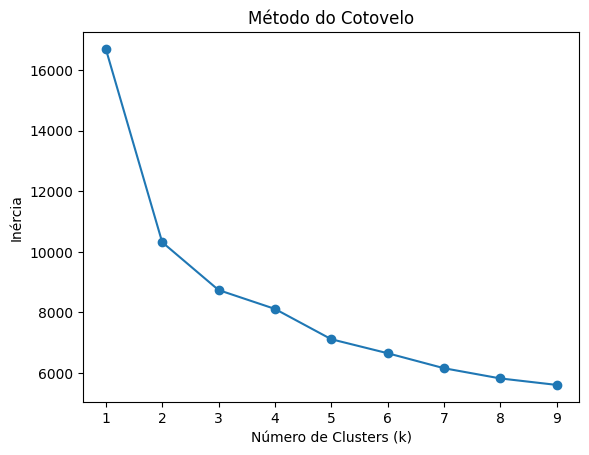

In [19]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [20]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [21]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Ponta.groupby('Cluster').agg({col: 'mean' for col in Ponta.select_dtypes(include=['number']).columns})
print(cluster_summary)

             idade      Minutos       G-PK    Assist         Xg       xAG  \
Cluster                                                                     
0        25.114634  1099.739659   1.885645  1.099757   2.302433   1.19562   
1        25.737143  2037.377143   1.645714  1.697143   2.021714  1.797714   
2        25.913978  2159.548387  10.462366  3.365591  11.207527  2.949462   
3        27.410714  2466.767857   4.017857  5.517857   4.410714  5.194643   
4        24.344262  1870.057377   4.311475  3.352459   4.330328  3.418852   
5        24.521127  2443.521127   8.366197  6.915493   8.352113  6.674648   

            xG+xAg        Prgc        PrgP       Cross  ...    KeyPass  \
Cluster                                                 ...              
0         3.364477   19.126521    35.23601   16.919708  ...   11.59854   
1         3.602286   27.714286  109.017143   27.742857  ...  20.725714   
2        12.702151   33.806452   47.483871   14.064516  ...  23.548387   
3         8.9

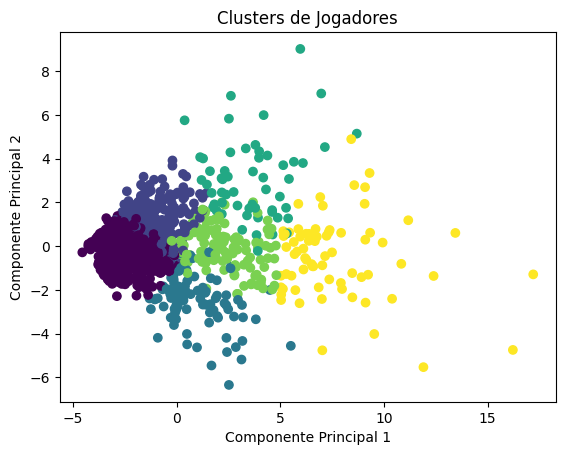

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [23]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Ponta.select_dtypes(include=np.number).columns
correlation_matrix = Ponta[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                     idade   Minutos      G-PK    Assist        Xg       xAG  \
idade             1.000000  0.053259  0.020492  0.043588  0.072181  0.020236   
Minutos           0.053259  1.000000  0.439726  0.492939  0.442821  0.526905   
G-PK              0.020492  0.439726  1.000000  0.447003  0.893984  0.489462   
Assist            0.043588  0.492939  0.447003  1.000000  0.473532  0.838650   
Xg                0.072181  0.442821  0.893984  0.473532  1.000000  0.495534   
xAG               0.020236  0.526905  0.489462  0.838650  0.495534  1.000000   
xG+xAg            0.033216  0.539022  0.860094  0.692444  0.909277  0.783093   
Prgc             -0.143003  0.502960  0.411665  0.585881  0.376949  0.704981   
PrgP              0.098966  0.662495  0.063761  0.432658  0.038033  0.511362   
Cross             0.085970  0.366251  0.149887  0.539080  0.124143  0.666642   
Faltas Sofridas  -0.086132  0.612725  0.313137  0.339848  0.297232  0.390690   
KeyPass           0.061549  0.617441  0.

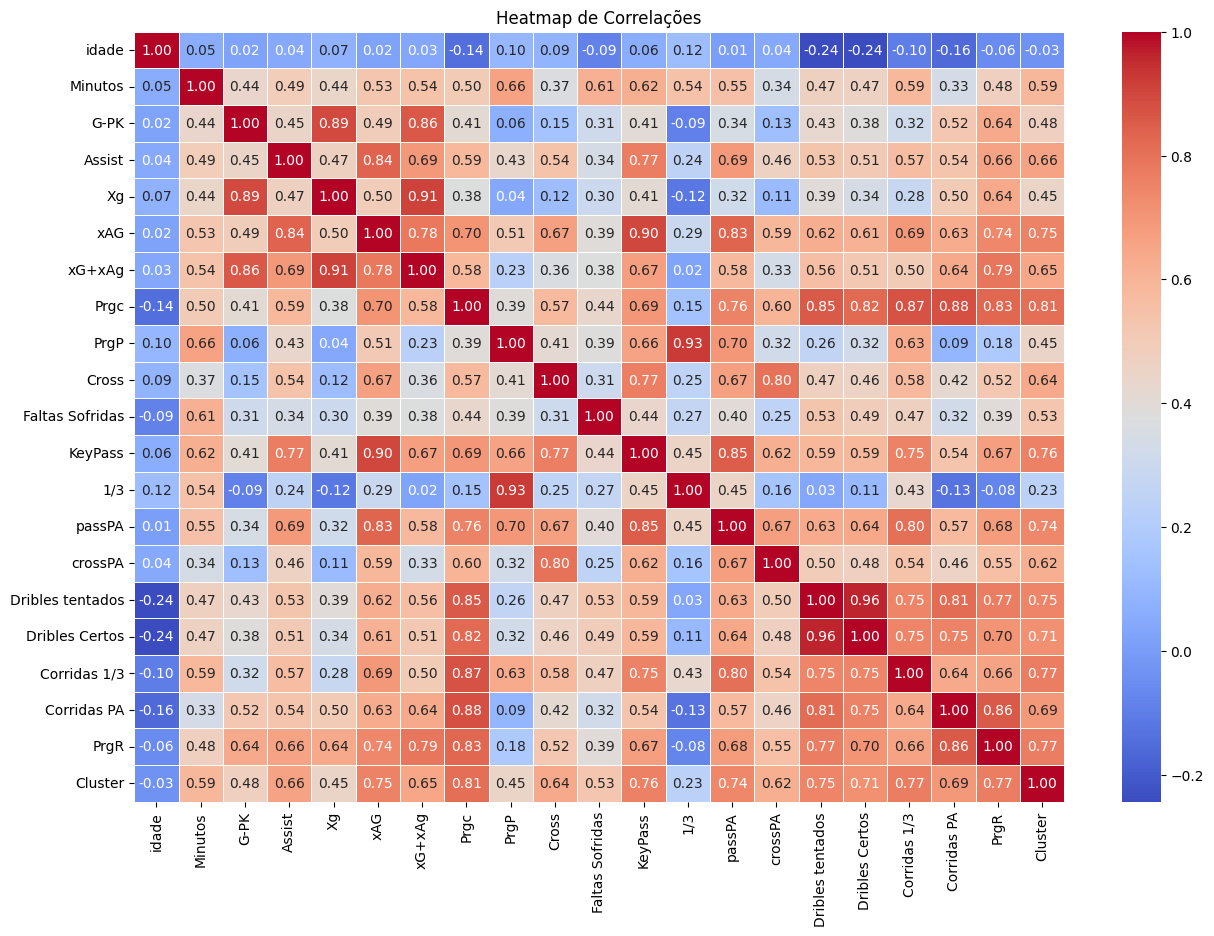

In [24]:
plt.figure(figsize=(15, 10))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()

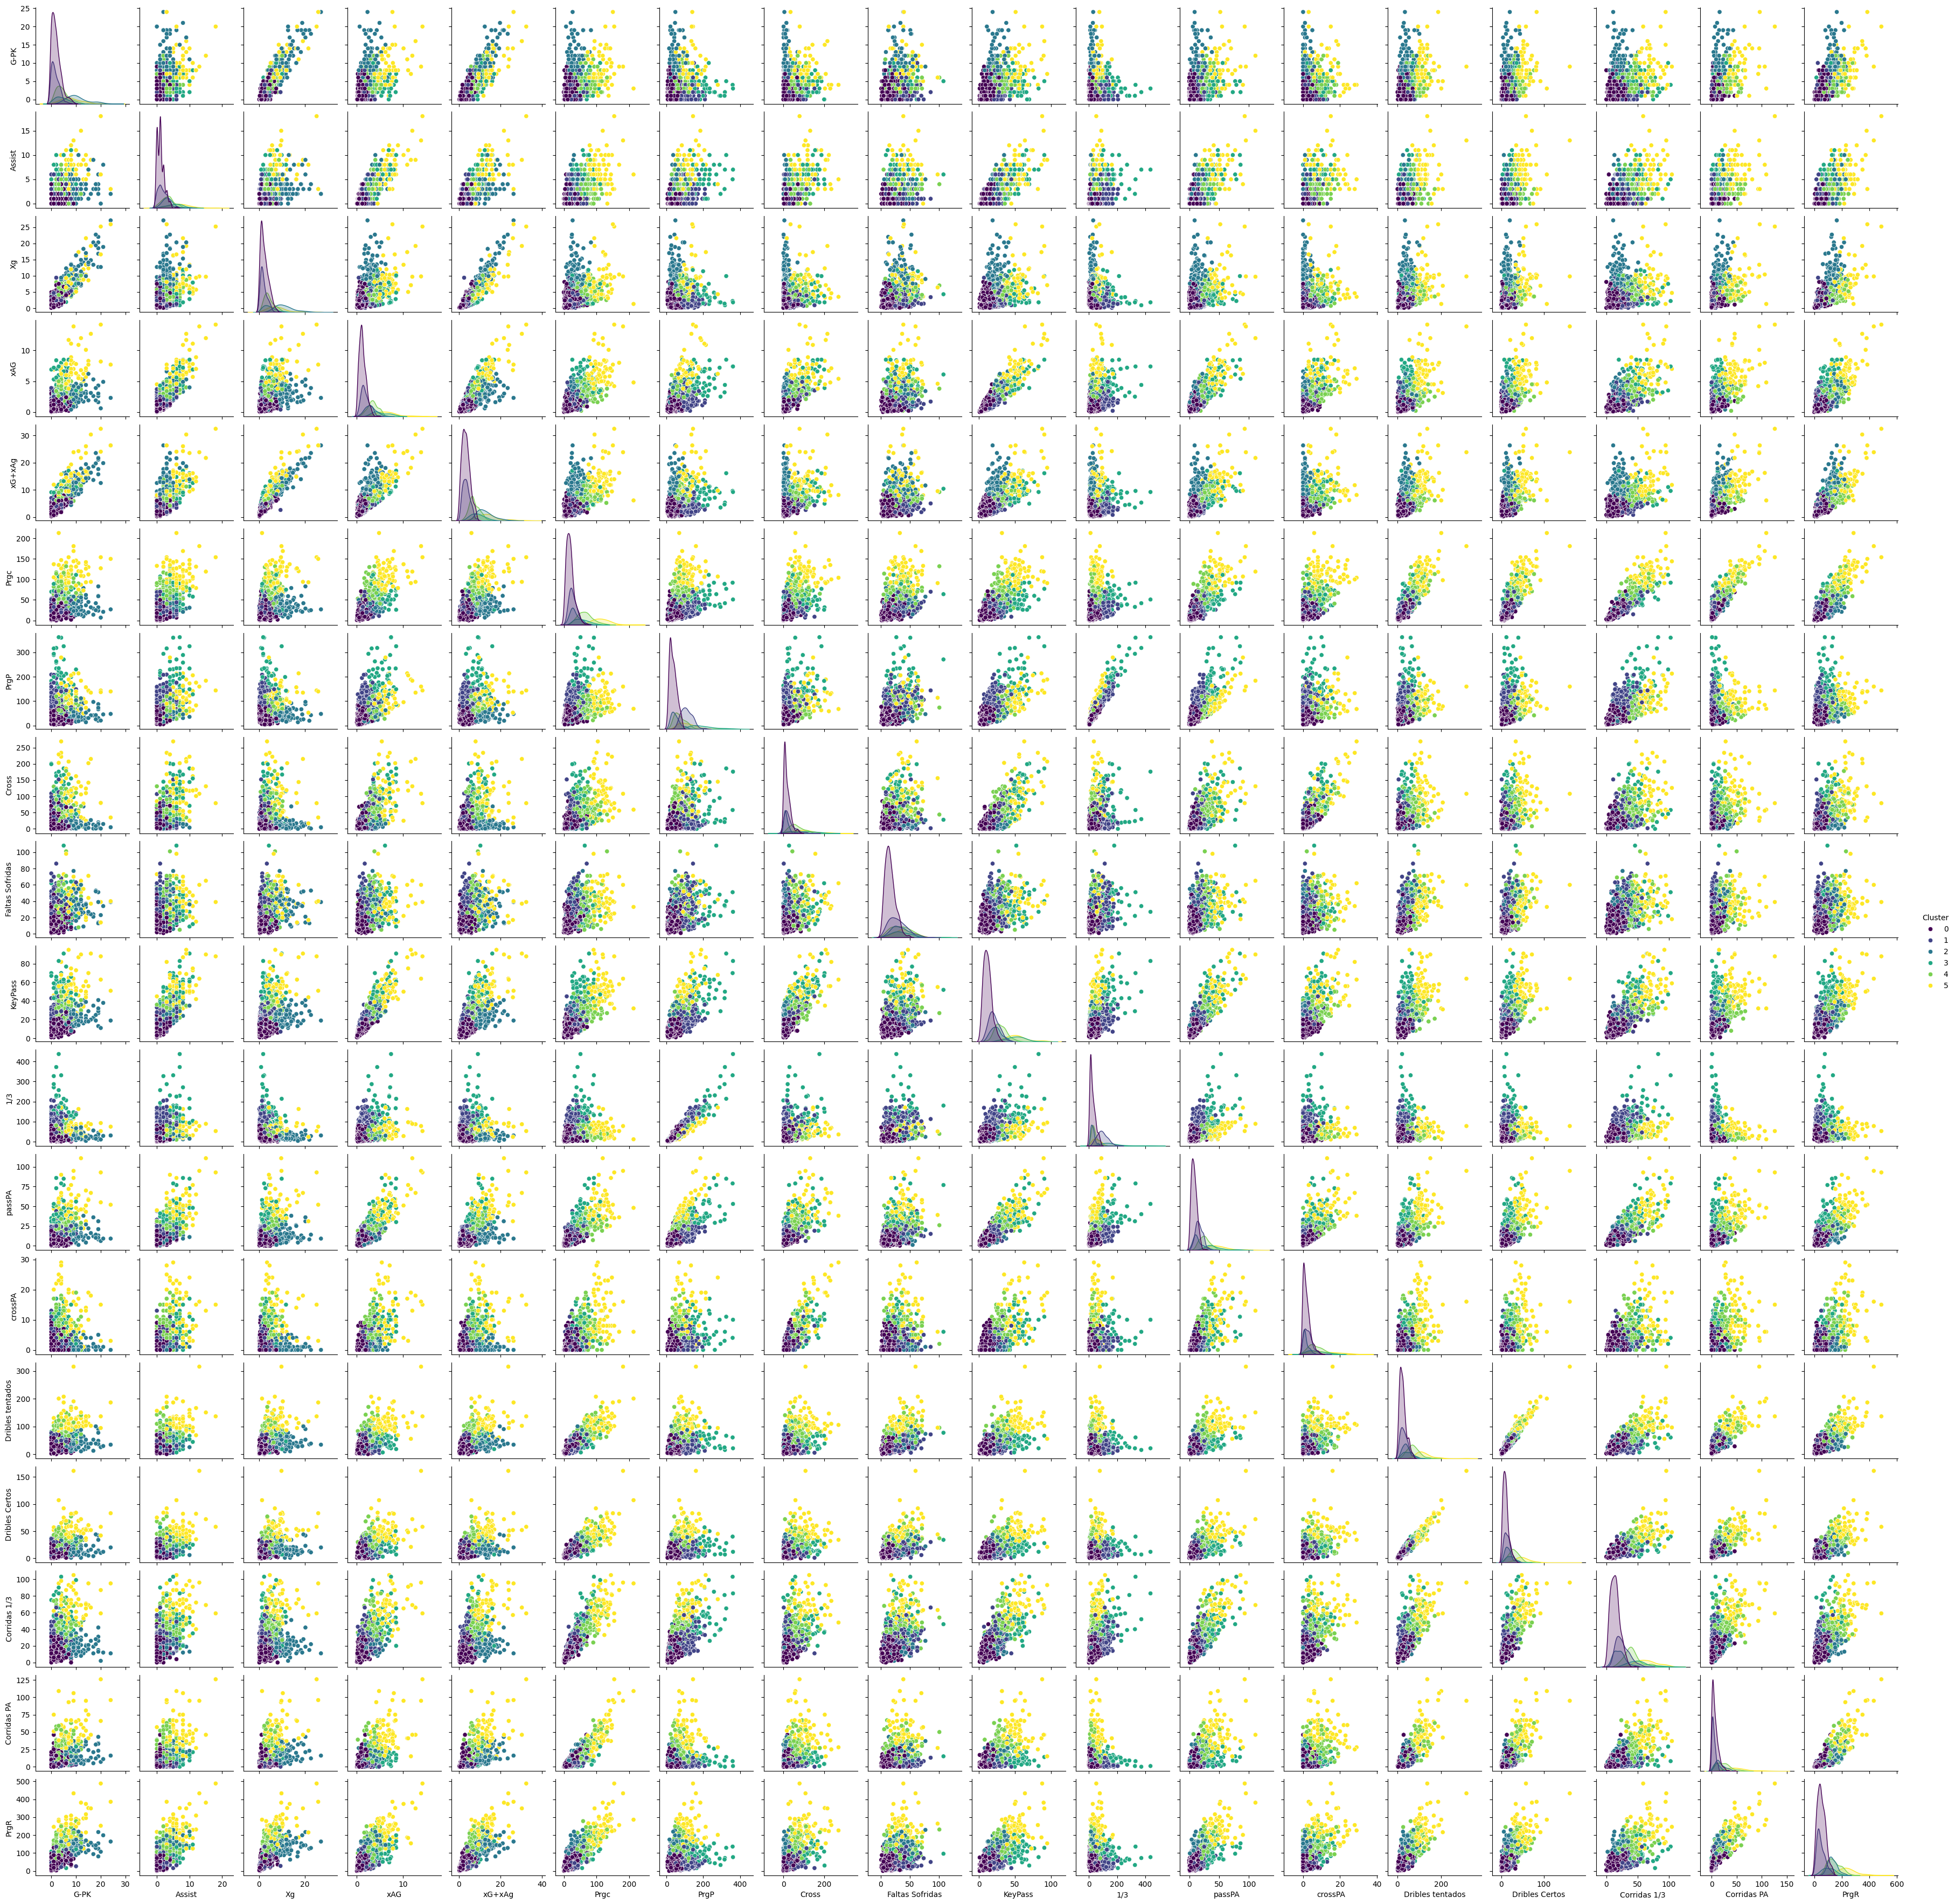

In [25]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Ponta[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Comportamento de Variáveis e Distribuição de Clusters para Pontas**

---

### **1. Análise de Correlações com Insights**

### 🧱 Correlações Fortes Positivas

#### **Dribles Tentados ↔ Dribles Certos / Corridas em Progressão**

⚡ Os pontas que tentam mais dribles também são:

* Mais bem-sucedidos nos **dribles certos** (correlação de **0.96**),
* Ativos em **corridas no terço final** (0.75) e na **área de ataque** (0.75).

👉 Perfil de jogador vertical, com **capacidade explosiva no 1x1**, muito útil para quebrar linhas defensivas.

---

#### **Cross ↔ Assist / KeyPass / xAG**

📨 Alta frequência de cruzamentos se associa com:

* Mais **assistências reais** (0.51),
* Maior número de **passes-chave** (0.45),
* **Assistências esperadas** (xAG: 0.58).

🔄 Pontas que chegam muito à linha de fundo e cruzam tendem a ser também **criadores de chances claras de gol**.

---

#### **Corridas 1/3 ↔ Corridas PA / Dribles Certos**

🏃‍♂️ A quantidade de conduções no terço final se relaciona com:

* Conduções dentro da área (0.64),
* Dribles bem-sucedidos (0.75).

🔧 Indica um estilo de ponta que **carrega a bola até a área**, essencial em situações de transição ofensiva.

---

#### **xG+xAG ↔ Assist / xG / xAG / PrgrC**

📊 A soma de gols esperados + assistências esperadas está ligada fortemente a:

* Assistências (0.87),
* xG (0.78),
* xAG (0.90),
* Passes progressivos curtos (PrgrC: 0.85).

👉 Jogadores com esse perfil são **decisivos em múltiplas frentes ofensivas**, tanto finalizando quanto criando.

---

### 📉 Correlações Negativas

Não há correlações negativas intensas entre variáveis ofensivas — o que reforça a ideia de que **habilidades como drible, cruzamento, passe chave e condução se complementam** para formar o ponta ideal.

A única negativa moderada (em torno de -0.24) aparece entre:

* **Idade** ↔ Dribles Tentados / Dribles Certos

🧓 Isso sugere que **jogadores mais jovens tendem a tentar mais jogadas individuais**, como o esperado nesse perfil.

---

### 🧠 Resumo

O ponta ideal no dataset:

* É **jovem**, explosivo e com alto volume de **dribles e corridas**,
* Atua como criador de jogadas com **passes-chave, assistências e cruzamentos**,
* Tem presença ativa tanto no **terço final quanto na grande área**,
* Apresenta **alto envolvimento em métricas avançadas** como xG, xAG e progressões.


---

---

### **2. Perfis dos Clusters com Médias**

---

### 🟢 **Cluster 0 – Pontas Econômicos, de Apoio e Baixo Volume**

📊 **Destaques**:

* Baixa minutagem (\~1099), poucos gols (G-PK = 1.88), poucas assistências (1.09)
* Baixíssimo volume de criação: xG+xAG = **3.36**, KeyPass = 11.6
* Quase nenhum drible (Dribles Certos = **10.1**), poucos cruzamentos
* Baixo envolvimento em progressões (Prgc = 19), passPA = **7.9**

🔎 **Resumo**: Jogadores que atuam pouco ou têm papel secundário em seus times. Suas métricas apontam baixo impacto ofensivo e de criação. São discretos e pouco influentes.

👤 Perfil: **ponta reserva, conservador ou de função mais tática/defensiva**.

---

### 🔴 **Cluster 1 – Pontas de Volume Moderado com Perfil Criativo**

📊 **Destaques**:

* Boa minutagem (\~2037), números medianos em gols/assistências
* **Destaque nas chances criadas (KeyPass = 20.7)** e ações progressivas
* Prgp elevado (109), xG+xAG decente (6.6), bom número de cruzamentos
* Dribles razoáveis, mas acerto médio

🔎 **Resumo**: Jogadores criativos, com boa contribuição ofensiva, especialmente em assistências e cruzamentos. Têm impacto constante e presença ofensiva significativa.

👤 Perfil: **pontas criadores, como Pepê (Porto) ou Ángel Di María**.

---

### 🔵 **Cluster 2 – Pontas Finalizadores com Baixo Apoio Criativo**

📊 **Destaques**:

* Alta minutagem (\~2159), bom número de gols (G-PK = 3.66), porém poucas assistências (1.36)
* Foco em finalizações (xG = 11.2), **baixo xAG (1.94)**
* Prgp e Prgc medianos, poucos passes chave
* **Dribles decentes (16.5)**, mas baixo envolvimento coletivo

🔎 **Resumo**: Jogadores mais voltados à finalização do que à criação. Boa movimentação ofensiva, mas pouca contribuição em assistências ou jogadas trabalhadas.

👤 Perfil: **pontas goleadores, estilo Malcom (ex-Zenit) ou Savarino (Atlético-MG)**.

---

### 🟣 **Cluster 3 – Pontas Elite, Decisivos e Multifuncionais**

📊 **Destaques**:

* Altíssima minutagem (\~2466), G-PK = **7.18**, Assist = **5.5**, xG+xAG = **13.4**
* Excelentes em todas as métricas: KeyPass = 51.5, Prgp = **192**, Cross = 91
* Destaque em dribles (22.3 certos), muita progressão com bola
* Melhor envolvimento ofensivo geral: criação, finalização, condução

🔎 **Resumo**: Os pontas mais completos da amostra. Altíssimo envolvimento ofensivo, múltiplas formas de gerar perigo. Atuam como referência técnica no ataque.

👤 Perfil: **pontas de elite — estilo Nico De La Cruz, Everton Ribeiro em auge ou Bruno Henrique 2019**.

---

### 🟡 **Cluster 4 – Pontas de Velocidade e Potência Física**

📊 **Destaques**:

* Minutagem mediana (\~1870), bons números ofensivos (G-PK = 4.3, Assist = 3.5)
* Muito volume de dribles (30 certos), corridas progressivas altas
* Baixo volume de passes chave, mas envolvimento direto alto (Prgp = 71.9)
* Prgc = 65, passPA alto

🔎 **Resumo**: Jogadores verticais, muito baseados em velocidade e 1x1. Nem sempre são os mais produtivos em assistência, mas quebram defesas com aceleração.

👤 Perfil: **pontas agudos — estilo Luiz Araújo, Artur (ex-Bragantino)**.

---

### 🟠 **Cluster 5 – Pontas Estrela com Volume Máximo**

📊 **Destaques**:

* Minutagem elevadíssima (\~2443), **G-PK = 8.36**, Assist = 6.91
* Altos valores de xG (8.35) e xAG (6.67)
* Extremamente ativos: **Prgp = 110**, Dribles Certos = 52, **Corridas PA = 51**
* Criam, driblam, finalizam — e são referência técnica clara

🔎 **Resumo**: Os melhores e mais completos da liga. São os mais perigosos, criativos e eficazes. Toda a produção ofensiva passa por eles.

👤 Perfil: **pontas estrela — estilo Vinícius Júnior, Antony ou Michael (Al-Hilal)**.

---

## 🔍 Comparativo Geral – Clusters de Pontas

| Cluster | Estilo                        | xG+xAG | Prgp  | Dribles Certos | Corridas PA | Perfil                         |
| ------: | ----------------------------- | ------ | ----- | -------------- | ----------- | ------------------------------ |
|       0 | Conservador e discreto        | 3.36   | 35.2  | 10.1           | 6.4         | Baixo impacto, reservas        |
|       1 | Criadores equilibrados        | 6.6    | 109.0 | 13.9           | 4.1         | Cruzamentos, construção        |
|       2 | Finalizadores com pouco apoio | 5.6    | 47.5  | 16.5           | 10.6        | Goleadores, menos associativos |
|       3 | Pontas completos e técnicos   | 13.4   | 192.8 | 22.3           | 24.4        | Decisivos, elite ofensiva      |
|       4 | Verticais e dribladores       | 7.4    | 71.9  | 30.7           | 25.6        | Quebradores de linha           |
|       5 | Estrelas ofensivas            | 15.0   | 110.8 | 52.1           | 51.0        | Referência técnica e criativa  |

---




In [34]:
cluster_names = {
    0: 'ponta sr',
    1: 'ponta criativo',
    2: 'ponta finalizador',
    3: 'ponta completo',
    4: 'ponta vertical',
    5: 'ponta elite',
}

# Adicionar nomes ao DataFrame
Ponta['Perfil'] = Ponta['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Ponta[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR','Perfil']].head())

              jogador     time posicao  idade  Minutos  G-PK  Assist   Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR          Perfil
1         Bukayo Saka  Arsenal   FW,MF     22     1729     5      10  6.8  7.6    13.7    96    70    117               39       58   15      38       12                90              41            32           51   255     ponta elite
3         Declan Rice  Arsenal      MF     25     2825     4       7  3.5  6.6    10.1    90   192    164               16       59  137      35        5                29              14            58           16    94  ponta completo
4       Ethan Nwaneri  Arsenal   FW,MF     17      895     4       2  1.2  1.2     2.4    46    33     54                5       16   17      16        6                62              37            25           17   113        ponta sr
5       Gabriel Jesus  Arsenal      FW     27      6

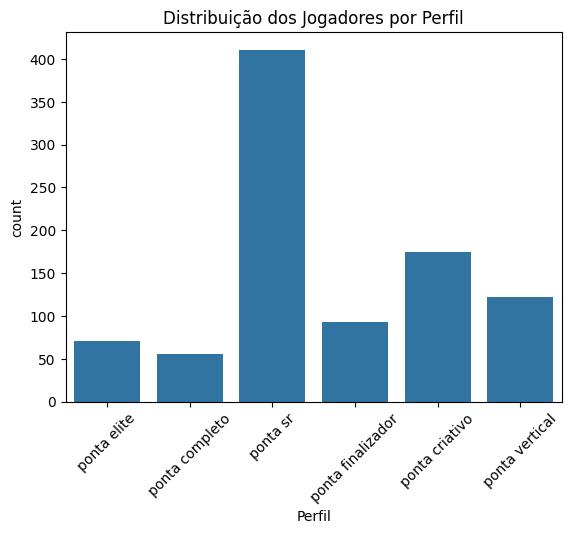

In [35]:
sns.countplot(data=Ponta, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [36]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR',]])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "ponta elite"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: ponta elite
                 jogador         time posicao  idade  Minutos  G-PK  Assist    Xg  xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR
1            Bukayo Saka      Arsenal   FW,MF     22     1729     5      10   6.8  7.6    13.7    96    70    117               39       58   15      38       12                90              41            32           51   255
7     Gabriel Martinelli      Arsenal   FW,MF     23     2290     8       4   7.4  5.0    12.4   124    52     92               21       40   11      37       15               109              33            33           64   289
13      Leandro Trossard      Arsenal      FW     29     2546     8       7   7.2  6.1    13.3    80   101     86               46       41   45      48       10                86              38            55           30   226
46         Morgan Rogers  Aston Villa   FW,MF     

In [48]:
# Dicionário dos peso para cada métrica
pesos = {
    'xG+xAg': 10,
    'KeyPass': 5,
    'Cross' : 8,
    '1/3': 2,
    'Dribles Certos': 5,
    'Corridas 1/3': 2,
    'Corridas PA': 7,
    'passPA': 8,
    'crossPA' : 8,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Ponta[coluna + '_Pontuacao'] = Ponta[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Ponta['Pontuacao_Total'] = Ponta[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Ponta['Pontuacao_Total'].min()
max_pontuacao = Ponta['Pontuacao_Total'].max()
Ponta['Pontuacao'] = (
    (Ponta['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'ponta elite'
jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: ponta elite
 Ranking            time posicao              jogador      Perfil  Pontuacao
       1       Barcelona      FW         Lamine Yamal ponta elite      100.0
       2       Barcelona   FW,MF             Raphinha ponta elite  97.986248
       3           Reims   FW,MF            Junya Ito ponta elite  93.295678
       4       Brentford      FW         Bryan Mbeumo ponta elite  91.895874
       5   Bayern Munich   FW,MF        Michael Olise ponta elite  89.611984
       6       Liverpool      FW        Mohamed Salah ponta elite  88.408644
       7          Nantes   FW,MF          Moses Simon ponta elite  87.794695
       8      Villarreal   MF,FW           Alex Baena ponta elite  87.671906
       9          Alavés   FW,MF       Carlos Vicente ponta elite  87.475442
      10         Chelsea   MF,FW          Cole Palmer ponta elite  84.503929
      11          Napoli   FW,MF      Matteo Politano ponta elite  84.209234
      12   Werder Bremen      M

In [30]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'ponta fin'  # Defina o perfil desejado
jogadores_filtrados = Ponta[Ponta['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))


Jogadores disponíveis no perfil 'ponta fin': ['Declan Rice', 'Martin Ødegaard', 'Youri Tielemans', 'Marcus Tavernier', 'Mikkel Damsgaard', 'Enzo Fernández', 'Andreas Pereira', 'Alexis Mac Allister', 'Dominik Szoboszlai', 'Ryan Gravenberch', 'Kevin De Bruyne', 'Mateo Kovačić', 'İlkay Gündoğan', 'Bruno Fernandes', 'Bruno Guimarães', 'Morgan Gibbs-White', 'James Maddison', 'Antoine Griezmann', 'Rodrigo De Paul', 'Pedri', 'Giovani Lo Celso', 'Isco', 'Luis Milla', 'Sergi Darder', 'Rubén García', 'Jude Bellingham', 'Luka Modrić', 'Himad Abdelli', 'Adrien Thomasson', 'Corentin Tolisso', 'Adrien Rabiot', 'Pierre Højbjerg', 'Lamine Camara', 'Téji Savanier', 'Fabián Ruiz Peña', 'Lee Kang-in', 'Vitinha', 'Joshua Kimmich', 'Matúš Bero', 'Julian Brandt', 'Vincenzo Grifo', 'Kevin Stöger', 'Andrej Kramarić', 'Tom Bischof', 'Granit Xhaka', 'Nadiem Amiri', 'Angelo Stiller', 'Marvin Ducksch', 'Éderson', 'Lucas Da Cunha', 'Hakan Çalhanoğlu', 'Henrikh Mkhitaryan', 'Nicolò Barella', 'Manuel Locatelli', 'Ma


Jogadores selecionados: Lamine Yamal, Raphinha, Antony, Rayan Cherki, Ousmane Dembélé, Gabriel Strefezza, David Neres
                jogador       time posicao  idade  Minutos  G-PK  Assist    Xg   xAG  xG+xAg  Prgc  PrgP  Cross  Faltas Sofridas  KeyPass  1/3  passPA  crossPA  Dribles tentados  Dribles Certos  Corridas 1/3  Corridas PA  PrgR
673        Lamine Yamal  Barcelona      FW     17     2856     9      13   9.8  13.9    23.8   181   160    108               60       64   78      95       16               316             161            96           95   433
681            Raphinha  Barcelona   FW,MF     27     2839    16       9  19.2  12.7    30.3    94   135    215               37       91   87      67       18               103              52            66           46   349
689              Antony      Betis      FW     24     1362     5       2   2.9   3.5     6.3    94    67     40               27       36   34      43        7                63              24       

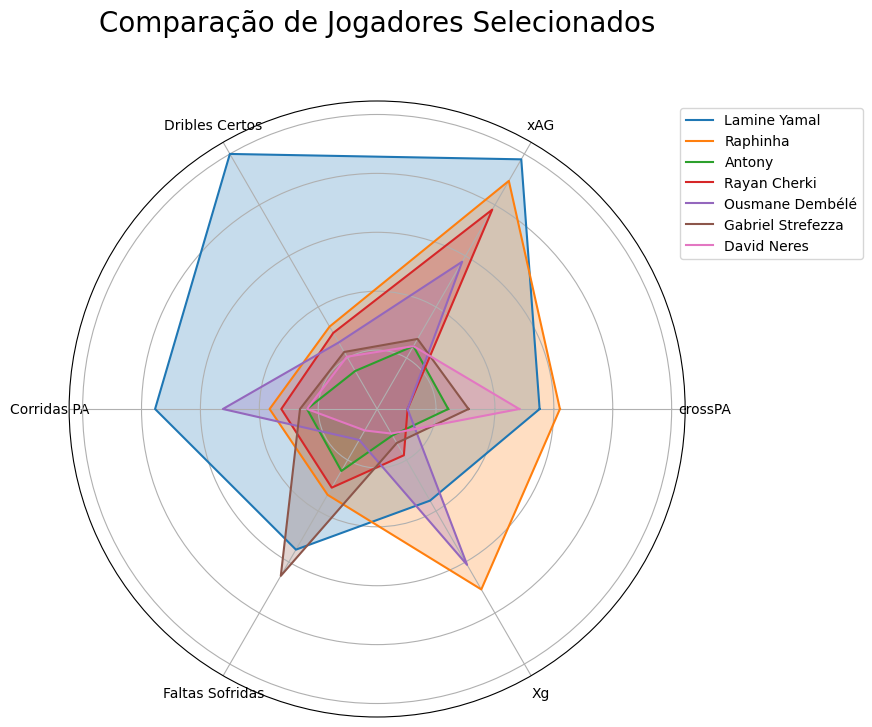

In [50]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'G-PK','Assist','Xg','xAG','xG+xAg','Prgc','PrgP','Cross','Faltas Sofridas','KeyPass','1/3','passPA','crossPA','Dribles tentados','Dribles Certos', 'Corridas 1/3','Corridas PA','PrgR',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['crossPA','xAG','Dribles Certos','Corridas PA','Faltas Sofridas','Xg']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['David Neres','Antony','Lamine Yamal','Gabriel Strefezza','Rayan Cherki','Ousmane Dembélé','Raphinha']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Ponta)